In [57]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
import numpy as np

newsgroups_data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
corpus = newsgroups_data.data

data = newsgroups_data.data  
target = newsgroups_data.target  
target_names = newsgroups_data.target_names  

print("Number of documents:", len(data))
print("Number of categories:", len(target_names))
print("Categories:", target_names)
print("Sample document:\n", data[0])

Number of documents: 11314
Number of categories: 20
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Sample document:
 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [58]:
# Step 1: Define a function to clean the text
def rmv_emails_websites(string, remove_special_chars=False):
    # Remove email addresses
    new_str = re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", '', string)
    
    # Remove URLs with various domain extensions
    new_str = re.sub(r"https?://\S+|www\.\S+", '', new_str)
    new_str = re.sub(r"\b\S+\.(com|org|net|edu|gov|co|info|biz|io)\b", '', new_str)
    
    # Remove numbers
    new_str = re.sub(r"[0-9]+", '', new_str)
    
    # Optionally remove special characters
    if remove_special_chars:
        new_str = re.sub(r"[^A-Za-z\s]", '', new_str)
    
    return new_str

In [59]:
from nltk.corpus import stopwords
import nltk

# Download the NLTK stopwords if you haven't already
nltk.download('stopwords')

# Use the NLTK English stopword list
stopwords = set(stopwords.words('english'))

# # Custom stopword list
# stopwords = set(["the", "is", "in", "and", "to", "from", "a", "for", "of", "on", "at", "with", "as", "by", "an", "it", "this", "that", "which", "be", "or", "are", "we", "can", "was", "but", "has", "have", "not", "if", "they", "their", "will", "do", "my", "all", "about"])


[nltk_data] Downloading package stopwords to C:\Users\FAIZ
[nltk_data]     SIDDIQUI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess the text data
def preprocess(text):
    
    # Remove emails, websites, and numbers
    text = rmv_emails_websites(text)
    
    text = text.lower()                              # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)              # Remove punctuation
    words = [lemmatizer.lemmatize(word)              # Lemmatize and remove stopwords
             for word in text.split() if word not in stopwords]
    return words

# Preprocess each document in the corpus
preprocessed_corpus = [preprocess(doc) for doc in corpus[:100]]  # Limiting to 100 documents for simplicity
print("Preprocessed Corpus:", preprocessed_corpus)

Preprocessed Corpus: [['wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'door', 'sport', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'door', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'email'], ['fair', 'number', 'brave', 'soul', 'upgraded', 'si', 'clock', 'oscillator', 'shared', 'experience', 'poll', 'please', 'send', 'brief', 'message', 'detailing', 'experience', 'procedure', 'top', 'speed', 'attained', 'cpu', 'rated', 'speed', 'add', 'card', 'adapter', 'heat', 'sink', 'hour', 'usage', 'per', 'day', 'floppy', 'disk', 'functionality', 'floppy', 'especially', 'requested', 'summarizing', 'next', 'two', 'day', 'please', 'add', 'network', 'knowledge', 'base', 'done', 'clock', 'upgrade', 'havent', 'answered', 'poll', 'thanks'], ['well', 'folk', 'mac', 'plus', 'f

In [61]:
# Step 3: Create the Document-Term Matrix (DTM)
# Get the unique vocabulary
vocab = sorted(set(word for doc in preprocessed_corpus for word in doc))
vocab_to_index = {word: idx for idx, word in enumerate(vocab)}
vocab_to_index

# Build the Document-Term Matrix (DTM)
dtm = [[0] * len(vocab) for _ in range(len(preprocessed_corpus))]


for doc_idx, doc in enumerate(preprocessed_corpus):
    word_counts = Counter(doc)
    for word, count in word_counts.items():
        dtm[doc_idx][vocab_to_index[word]] = count
        
print("Document-Term Matrix:")
for row in dtm:
    print(row)   

Document-Term Matrix:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
# Convert DTM to numpy array
dtm = np.array(dtm)

# SVD function to approximate topics
def svd_from_scratch(matrix, num_components):
    M = np.dot(matrix, matrix.T)
    N = np.dot(matrix.T, matrix)
    eigvals_u, U = np.linalg.eigh(M)
    eigvals_v, V = np.linalg.eigh(N)
    
    idx_u = np.argsort(eigvals_u)[::-1][:num_components]
    idx_v = np.argsort(eigvals_v)[::-1][:num_components]
    
    U = U[:, idx_u]
    V = V[:, idx_v]
    singular_values = np.sqrt(eigvals_u[idx_u])
    
    return U, singular_values, V.T

In [63]:
# Select number of topics (components)
num_components = 10
U, S, Vt = svd_from_scratch(dtm, num_components)

# Calculate document-topic and topic-word probabilities
document_topic_matrix = U * S[:num_components]
topic_word_matrix = Vt[:num_components, :]

# Normalize to get probabilities
document_topic_probs = document_topic_matrix / document_topic_matrix.sum(axis=1, keepdims=True)
topic_word_probs = topic_word_matrix / topic_word_matrix.sum(axis=1, keepdims=True)

print("Document-Topic Probabilities:\n", document_topic_probs)
print("Topic-Word Probabilities:\n", topic_word_probs)


Document-Topic Probabilities:
 [[ 2.49331432e-01 -4.27172584e-01  9.86069542e-01  2.05122097e-02
  -2.46177934e-02  4.07840082e-02 -1.97118420e-02  1.33215260e-01
  -1.62210199e-01  2.03799966e-01]
 [ 1.62343819e-01 -1.81498932e-01  2.32843240e-01  3.69827674e-01
  -1.04591174e-01  3.17115212e-01 -4.64115691e-02  2.34546958e-01
  -4.27929564e-02  5.86177282e-02]
 [ 2.11720168e-01 -1.58264329e-01  2.76843238e-01  1.43330731e-01
  -3.51380871e-01  4.25907620e-01  2.72055413e-01  5.74341792e-02
  -6.69667846e-02  1.89320636e-01]
 [ 1.18310898e-01 -1.67327074e-01  1.71850203e-01  2.25063980e-01
  -5.26078653e-01  6.02526988e-01  1.79119371e-01  2.16625625e-01
   3.63643965e-02  1.43544266e-01]
 [ 2.72298565e-01 -6.37968852e-01  1.29725762e-01  3.66963179e-01
  -3.81697304e-01  6.85419815e-01  5.08635787e-01  1.43910503e-02
  -2.96173141e-01  3.38405138e-01]
 [ 4.56669131e-01 -4.51030651e-01  1.75028306e-01  4.20182765e-01
  -4.74932851e-01  8.41870256e-01  5.79783808e-01 -8.78807630e-02
  

In [64]:

print("U           - ",U.shape)
print("Sigma       - ",S.shape)
print("V_transpose - ",Vt.shape)

U           -  (100, 10)
Sigma       -  (10,)
V_transpose -  (10, 4141)


<Axes: >

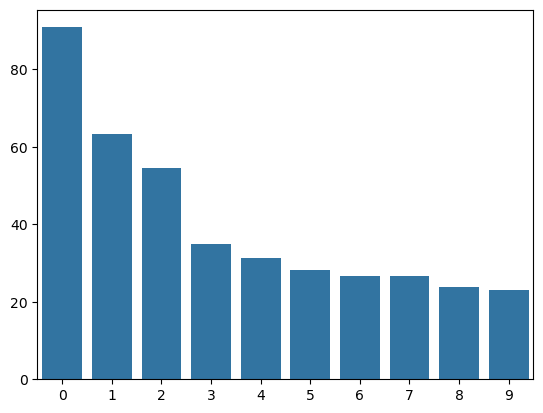

In [65]:
import seaborn as sns
sns.barplot(x=list(range(len(S))), y = S)

#What do you notice about the values in Sigma? Do they conform to what you expected singular values to be like?
